In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Exercise 01

<img src="./imgs/exercise_01.png" alt="Exercise 01" width="600"/>   

Let's solve this using  Metropolis Algorithm.

In [2]:
A = 1
num_iter = 1000000
kT_arr = np.array([0.1, 0.5, 1, 2])
energy_arr = np.linspace(0, 13, 500)

In [3]:
def metropolis_boltzman(num_iter, energy_arr, A, kT):
    energy_distribution = np.zeros(num_iter)

    N_energies = energy_arr.shape[0]
    current_energy = energy_arr[0]
    current_energy_prob = A*np.exp(-current_energy/kT)
    for i in range(num_iter):
        new_energy = energy_arr[random.randint(0, N_energies-1)]
        new_energy_prob = A*np.exp(-new_energy/kT)
        gamma = min(1, new_energy_prob/current_energy_prob)

        if (random.uniform(0, 1) <= gamma):
            current_energy = new_energy
            current_energy_prob = new_energy_prob

        energy_distribution[i] = current_energy

    return energy_distribution

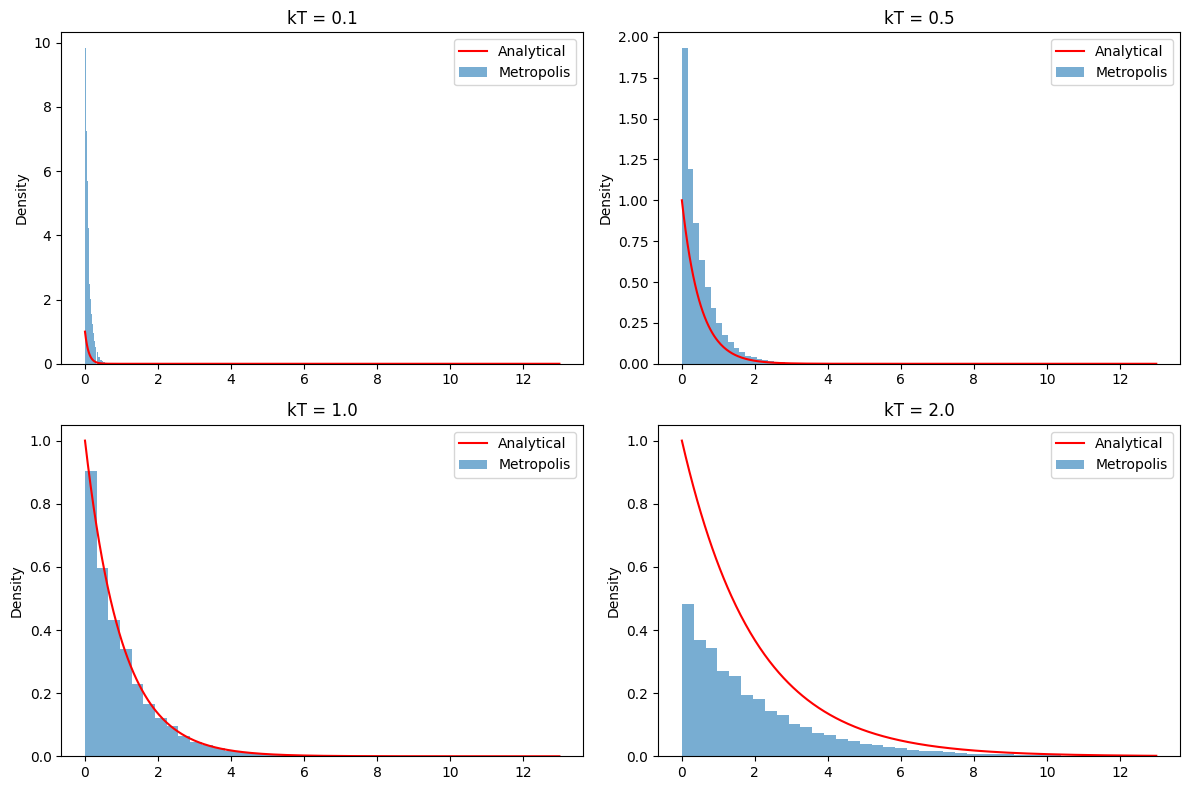

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for idx, kT in enumerate(kT_arr):
    energy_distribution = metropolis_boltzman(num_iter, energy_arr, A, kT)
    analytical_energy_distribution = A * np.exp(-energy_arr / kT)

    ax = axs[idx // 2, idx % 2]
    ax.plot(energy_arr, analytical_energy_distribution, c="r", label="Analytical")
    ax.hist(energy_distribution, bins=40, density=True, alpha=0.6, label="Metropolis")
    ax.set_title(f"kT = {kT}")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

There is a clear deviation of the analytical distribution line from the histograms obtained from the algorithm in kT={0.1, 0.5, 2} cases. The reason for this is that $A=1 \text{ (constant)}$ is set. However, by the normalization condition $\int_{0}^{\infty} Ae^{-\frac{\epsilon}{kT}} = 1 \rightarrow A = \frac{1}{kT}$, A varies with the value of kT. This does not affect the metropolis algorithm because the stationary probability ratio is considered in the $\Gamma$ value $\left( \Gamma(x, x') = min \left[ 1, \frac{\pi(x')}{\pi(x)} \right] \right)$.

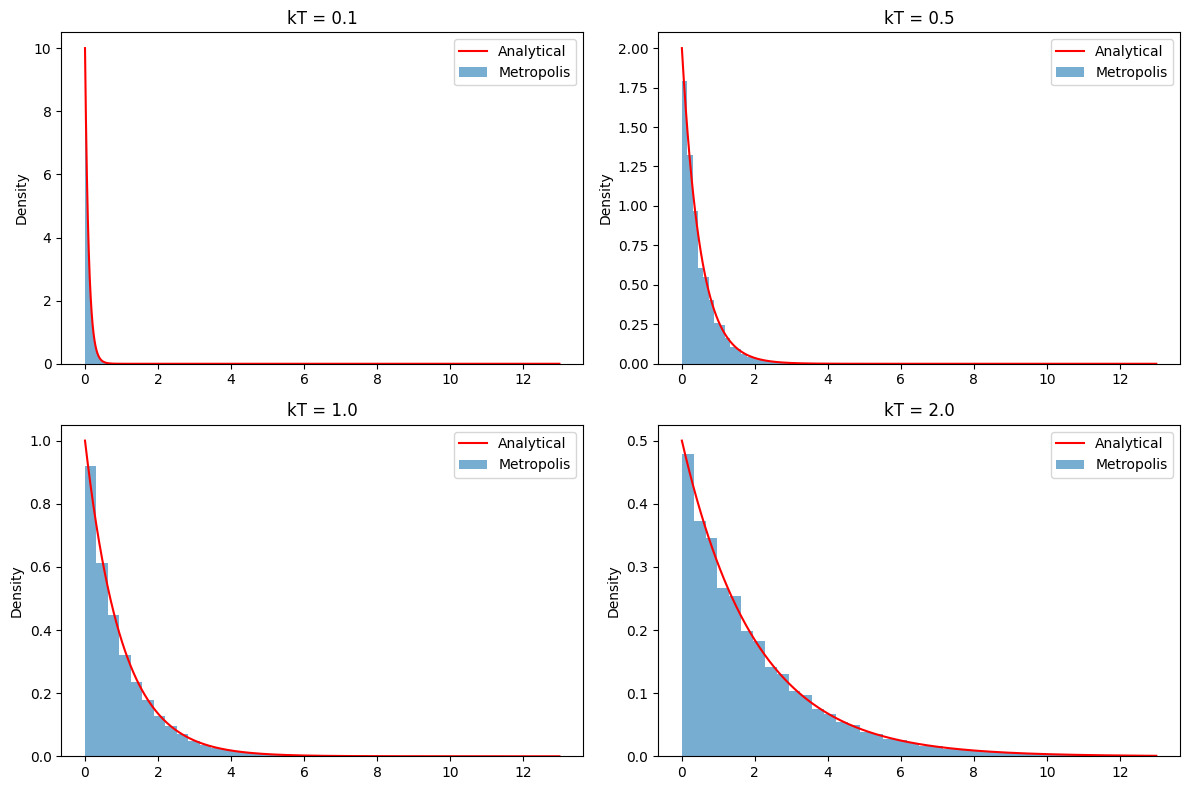

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for idx, kT in enumerate(kT_arr):
    energy_distribution = metropolis_boltzman(num_iter, energy_arr, A, kT)
    analytical_energy_distribution = (1/kT) * np.exp(-energy_arr/kT)

    ax = axs[idx // 2, idx % 2]
    ax.plot(energy_arr, analytical_energy_distribution, c="r", label="Analytical")
    ax.hist(energy_distribution, bins=40, density=True, alpha=0.6, label="Metropolis")
    ax.set_title(f"kT = {kT}")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()